In [41]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# 데이터 불러오기

당뇨병 : 당뇨병은 인슐린의 분비량이 부족하거나 정상적인 기능이 이루어지지 않는 등의 대사질환의 일종으로,<br> 혈중 포도당의 농도가 높아지는 고혈당을 특징으로 하며, 고혈당으로 인하여 여러 증상 및 징후를 일으키고 소변에서 포도당을 배출하게 된다. <BR>
당뇨병을 유발할 수 있는 환경 인자로는 고령, 비만, 스트레스, 임신, 감염, 약물(스테로이드제제, 면역억제제, 이뇨제) 등이 있습니다.

In [42]:
# 실습1

df = pd.read_csv("DIABETES.csv")
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


- Y : 당뇨 발병확률
- AGE : 나이
- GENDER : 성별 1-남성 , 2-여성
- BMI : 체질량 지수 (키와 몸무게를 기준으로 체지방을 측정한 것)
- BP : blood pressure (혈압)
- CHOLESTEROL : 총 콜레스테롤
- LDL : 저밀도 콜레스테롤(Low density lipoprotein cholesterol)
- HDL : 고밀도 콜레스테롤(High density lipoprotein cholesterol)
- TCH : 총 콜레스테롤 (Total Cholesterol)
- LTG : 라모트리진 (치료제)
- GLICOSE : 포도당(glucose) 공복 100mg/dL미만, 식후 2시간 140mg/dL 미만 정상

LDL : 혈중 콜레스테롤을 운반하는 지단백 중의 하나입니다. LDL 콜레스테롤은 일명 '나쁜 콜레스테롤'이라고 하는데, 이는 혈관벽에 과도한 콜레스테롤 침착을 유발해서 동맥경화증과 심장질환 위험을 높이기 때문입니다. 그러므로 이 검사는 고밀도 지단백 콜레스테롤 검사와 함께 심장질환 발생 위험도를 예측하기 위해 사용됩니다.

HDL : 혈액 내 콜레스테롤을 운반하는 지단백 중 하나입니다. HDL 콜레스테롤을 흔히 '좋은 콜레스테롤'이라고 부르는데, 이는 혈중의 과다한 콜레스테롤을 간으로 이동하는 역할을 하기 때문입니다. 혈중 HDL은 혈액으로부터 콜레스테롤을 제거하여 혈관벽에 침착되어 쌓이게 되는 플라그(plaque)의 생성을 저하시켜 동맥경화나 심장질환 위험을 감소시켜 줍니다.



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Y            442 non-null    int64  
 1   AGE          442 non-null    int64  
 2   GENDER       442 non-null    int64  
 3   BMI          442 non-null    float64
 4   BP           442 non-null    float64
 5   CHOLESTEROL  442 non-null    int64  
 6   LDL          442 non-null    float64
 7   HDL          442 non-null    float64
 8   TCH          442 non-null    float64
 9   LTG          442 non-null    float64
 10  GLUCOSE      442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [44]:
df.isna().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

모든 변수에는 결측치가 존재하지 않는다.


<Axes: >

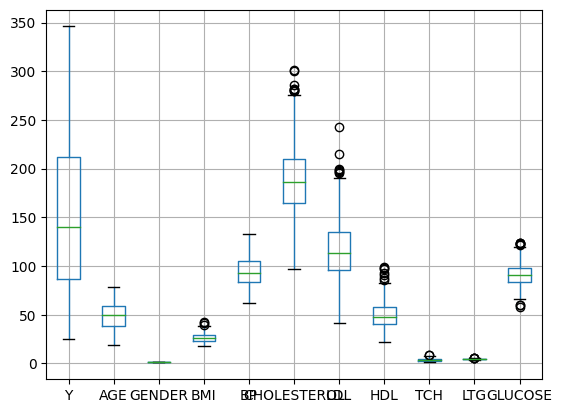

In [45]:
df.boxplot()

In [46]:
df.describe()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,152.133484,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,77.093005,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,25.000000,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,87.000000,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,140.500000,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,211.500000,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,346.000000,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


이상치가 존재하지만 데이터에 대한 도메인지식이 없기에 제거하지 않고 분석하겠다.

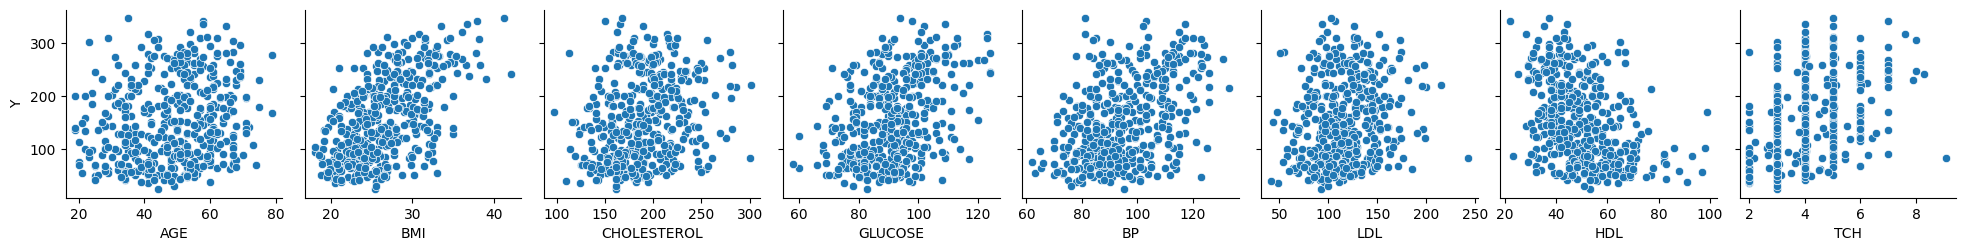

In [47]:
sns.pairplot(df, y_vars="Y", x_vars=["AGE", "BMI", "CHOLESTEROL", "GLUCOSE" , "BP", "LDL" , "HDL" , "TCH"])

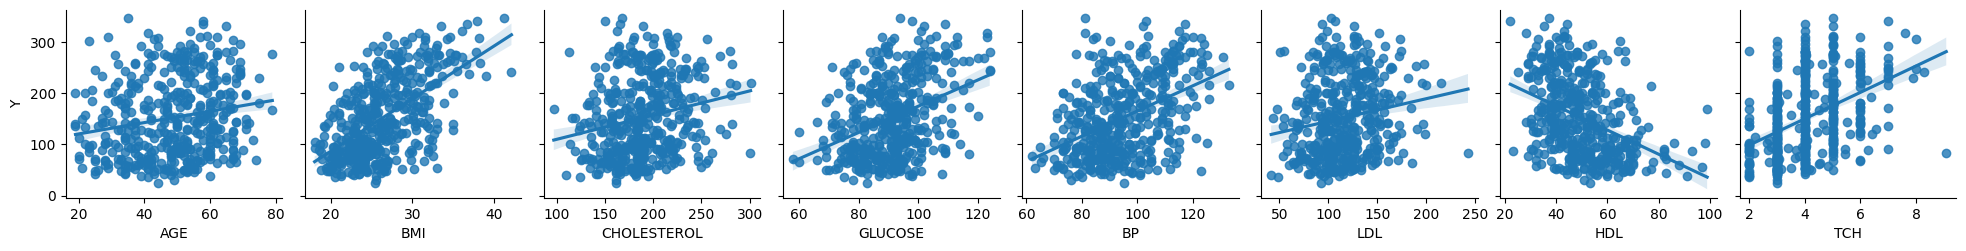

In [48]:
sns.pairplot(df, y_vars="Y", x_vars=["AGE", "BMI", "CHOLESTEROL", "GLUCOSE" , "BP", "LDL" , "HDL" , "TCH"] , kind = "reg")

당뇨 발병 확률과 성별은 제외한 변수간의 산점도를 확인하였다. <br>
당뇨병을 유발할 수 있는 환경 인자로는 고령, 비만, 스트레스, 임신, 감염, 약물(스테로이드제제, 면역억제제, 이뇨제) 등이 있다고 알려져있는데, BMI의 산점도를 확인했을 때 BMI와 양의 상관관계가 있는 것으로 보여진다.

In [49]:
df.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


# 데이터 전처리

In [50]:
df = df.replace({"GENDER" :{2 : 0}})

성별로 배수관계에 있지 않게 하기 위해서 남자의 값 1 여자의 값을 0으로 변환하였다.

In [51]:
df

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,0,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,75,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,141,72,0,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,206,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,135,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...,...
437,178,60,0,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,104,47,0,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,132,60,0,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,220,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [52]:
# train/test data 분리
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 10)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (353, 11)
test data size : (89, 11)


In [53]:
reg_model = smf.ols(formula = "Y ~ AGE+GENDER+BMI+BP+CHOLESTEROL+LDL+HDL+TCH+LTG+GLUCOSE", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     35.92
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.26e-47
Time:                        13:10:16   Log-Likelihood:                -1905.0
No. Observations:                 353   AIC:                             3832.
Df Residuals:                     342   BIC:                             3875.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -358.3113     74.517     -4.808      

Prob(Omnibus) , Prob(JB) 값이 0.05 보다 크므로 정규성을 만족한다. <BR>
또한 Durbin-Watson값이 2에 근접하므로 잔차는 독립성을 갖는다. <BR>
P값이 가장 높은 변수가 나이이지만 당뇨병을 유발할 수 있는 환경 인자로는 고령이 존재하므로 제거하지 않고 분석하겠다. <BR>
다음으로 P값이 높은 변수는 HDL이고 이는 제거하겠다.


In [54]:

reg_model = smf.ols(formula = "Y ~ AGE+GENDER+BMI+BP+CHOLESTEROL+LDL+TCH+LTG+GLUCOSE", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     40.01
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           2.04e-48
Time:                        13:10:16   Log-Likelihood:                -1905.1
No. Observations:                 353   AIC:                             3830.
Df Residuals:                     343   BIC:                             3869.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -335.6740     35.752     -9.389      

HDL변수를 제거한 후 OLS회귀를 하였다. 이때 P값이 가장 높은 변수는 GLUCOSE이고 이는 포도당을 의미한다. <BR>
당뇨를 판단할 때 8시간 동안 열량 섭취가 없는 공복 상태에서 측정한 공복 혈당이 126mg/dL 이상 <BR>
경구 당부하 검사에서 75mg의 포도당을 섭취한 뒤 측정한 2시간째 혈당이 200mg/dL 이상 기준이 존재하므로 포도당 변수는 제거하지 않겠다. <BR>
그 다음으로 높은 P값은 LDL값이므로 제거하겠다.


In [55]:
reg_model = smf.ols(formula = "Y ~ AGE+GENDER+BMI+BP+CHOLESTEROL+TCH+LTG+GLUCOSE", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     44.69
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           6.96e-49
Time:                        13:10:16   Log-Likelihood:                -1906.0
No. Observations:                 353   AIC:                             3830.
Df Residuals:                     344   BIC:                             3865.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -317.7883     33.138     -9.590      

나이와 포도당변수를 제외한 변수들의 P값은 유의수준 0.05보다 작으므로 더이상 제거할 변수가 없다고 판단하였다.

In [56]:
df_train_x = df_train.drop(["Y","LDL" , "HDL"], axis = 1)

df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

,Variable,VIF
2,GENDER,1.23
1,AGE,1.26
3,BMI,1.43
4,BP,1.45
8,GLUCOSE,1.51
5,CHOLESTEROL,1.68
7,LTG,2.15
6,TCH,2.22
0,const,131.78


모든 변수의 VIF계수가 10을 안넘는다. 따라서 다중공선성 문제가 없다.


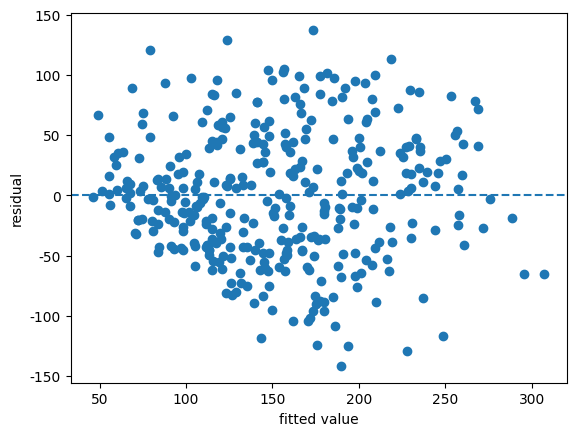

In [57]:
# 잔차 산점도: X-예측값, Y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

잔차와 예측값의 산점도를 확인해보면 랜덤하지 않고 이분산성을 띄고 있다.
따라서 Y값을 변환시켜주면 해결할 수 있다.

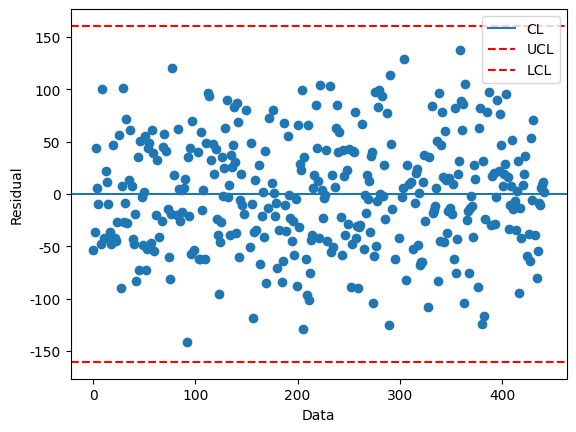

In [58]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data")  ;  plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

앞에서 본 더빈왓슨 통계량을 통해서 확인했듯이 잔차는 독립성을 만족한다.

In [59]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['Y'], train_pred))
print("test data의 결정계수:", r2_score(df_test['Y'], test_pred))

train data의 결정계수: 0.5096304338828778
test data의 결정계수: 0.52917309351871


위의 결정계수는 조정된 결정계수값이 아니다. 위에서 조정된 결정계수값을 가지고 오면 0.498이고 이 값은 유의미하지 않다고 판단된다. <BR>
그 이유는 설명변수의 설명력이 부족하다고 판단된다. 따라서 당뇨확률에 대한 설명력을 갖는 설명변수를 추가해야 될 것 같다.

<Axes: >

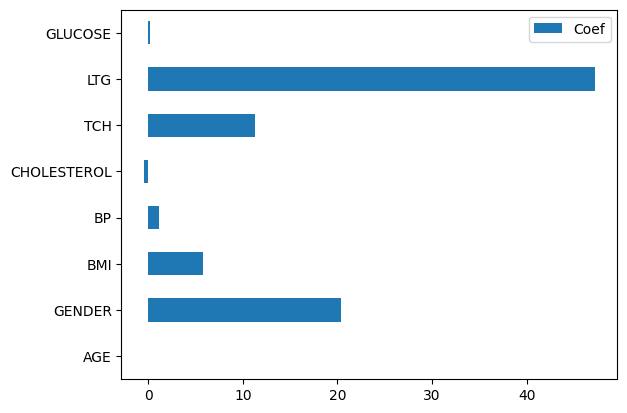

In [65]:
# 63 Page
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                           index = ['AGE',"GENDER",'BMI','BP', "CHOLESTEROL", 'TCH', "LTG", "GLUCOSE"])
df_reg_coef.plot.barh(y = "Coef")

In [63]:
reg_result.params

Intercept     -317.788290
AGE             -0.005682
GENDER          20.370330
BMI              5.798101
BP               1.132660
CHOLESTEROL     -0.428207
TCH             11.278384
LTG             47.194551
GLUCOSE          0.167854
dtype: float64

ŷ = -317.788290 - 0.005 \*AGE + 20.37 \*GENDER + 5.8\*BMI + 1.13\*BP - 0.43\*CHOLESTEROL + 11.28\*TCH +47.2\*LTG + 0.17\*GLUCOSE

결론 : 위 모델은 실무에서 사용하기에는 힘들다고 생각한다.